<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/Linera_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
# Getting the data in dataframe
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Getting an idea about duplicates
df.duplicated().sum()

np.int64(1)

In [6]:
# Removing the duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Getting an idea about duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Now, there are no duplicate values in the data

In [5]:
# Getting an idea about the dat types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# We can see that all  the columns  are in expected data types.

In [8]:
# getting an idea about the NULL values
df.isnull().sum().any()

np.False_

In [ ]:
# False means there are no Null values

In [9]:
# getting an idea about the NULL values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
# getting an idea about the shape of the data
print('Shape:', df.shape)
print('Columns:', df.shape[0])
print('Rows:', df.shape[1])


Shape: (1337, 7)
Columns: 1337
Rows: 7


In [13]:
# Statistical analysis
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
'''
1) From the Age column, we can say that mean and median are approximately same which means data is symmetric.
2) From the BMI column, we can say that mean and median are approximately same which means data is symmetric.
3) From the Charges column, we can say that mean and median are not approximately same which means data is skewed.
'''

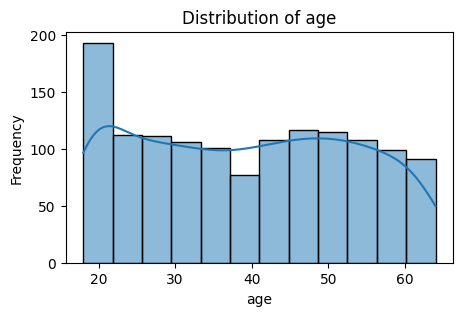

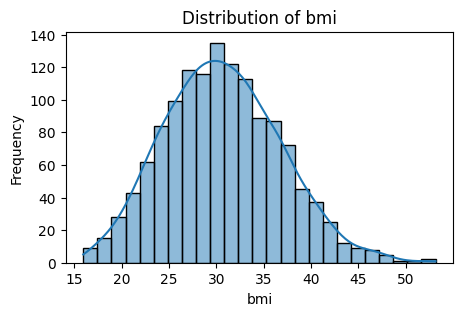

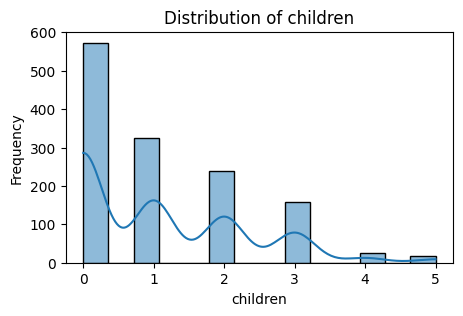

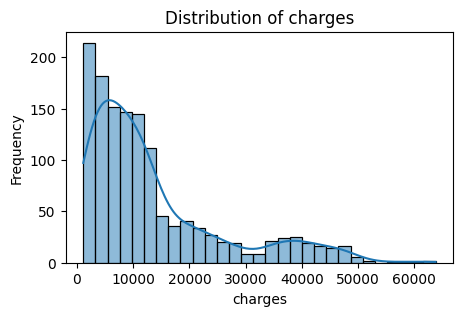

In [14]:
# Histogram for numeric columns (to understand the distribution of data)
for col in df.select_dtypes(include= np.number):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
'''
1) From the  histogram of age column  we can see that we have maximum people are from age 18-22  and the remaining age groups have almost same number in people
2) From the histogram of BMI column we can see distribution is normal.
3) From the histogram of Charges column we can see that distribution is skewed.
4) From the histogram of children column we can see that no of children increases the frequency of people decreases.
'''

In [ ]:
# Boxplots for all numerical columns

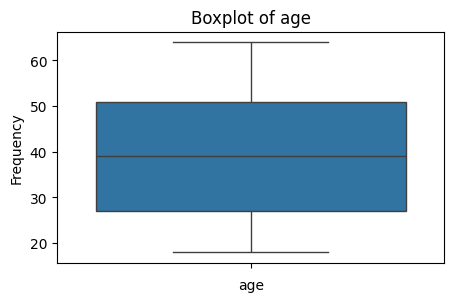

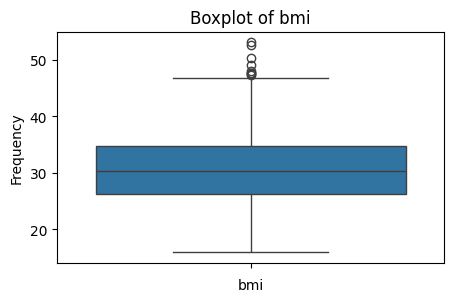

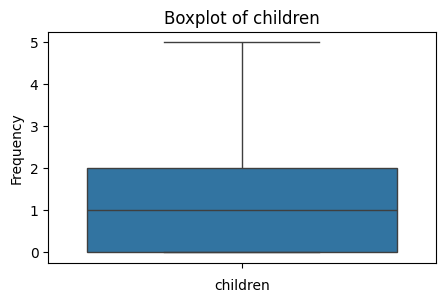

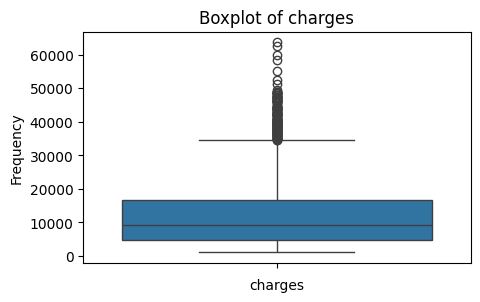

In [16]:
for col in df.select_dtypes(include= np.number):
    plt.figure(figsize=(5, 3))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# From the above plots , we can see that age and children columns are not having outliers
# From the above plots, we can seet that BMI and charges columns are having outliers in the left hand trail.

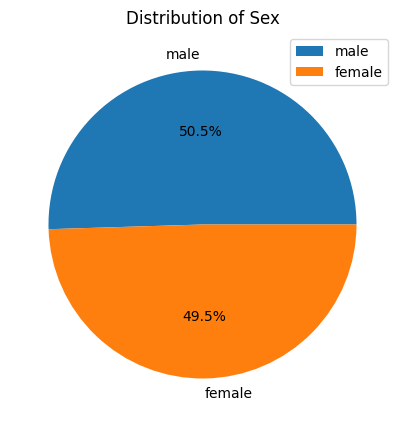

In [18]:
# Pie chart for "Sex" column
counts = df['sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.legend()
plt.show()

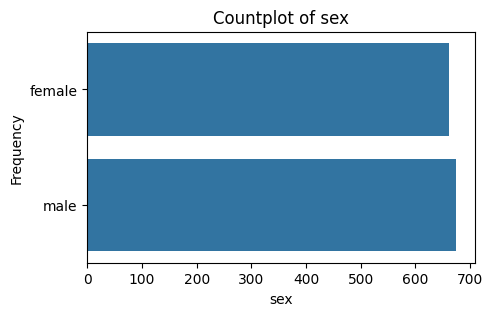

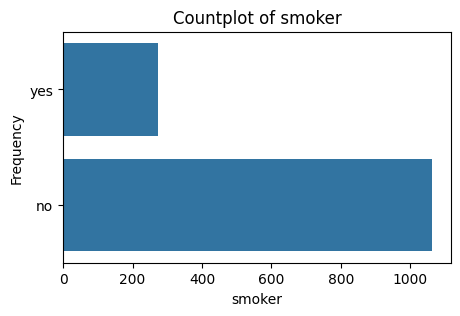

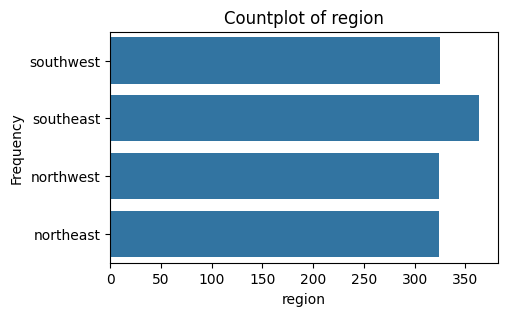

In [19]:
# Questio-> Write the python code for Countplots of all object columns.
for col in df.select_dtypes(include= 'object'):
    plt.figure(figsize=(5, 3))
    sns.countplot(df[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Conclusions->
# From the sex column we can say that we have almost equal number of male and female customers.
# From the smoker column, we can say that we have sigficantly high number of non-smokers than smokers.
# From the Region column, we can say that we have slightly higher number of customers from 'southeast'region. All other reions have almost equal number of customers.

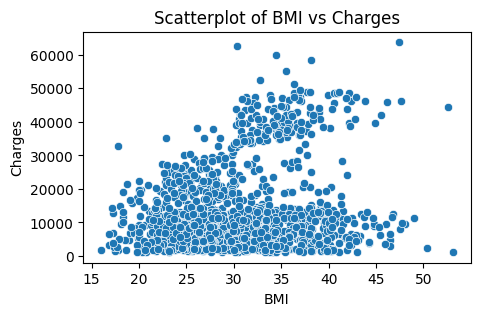

In [20]:
# ScatterPlot (Bmi and Charges)
plt.figure(figsize=(5, 3))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatterplot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [21]:
# Getting the list of columns
print('Columns:', df.columns)

Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [27]:
# Dealing with "binary" categorical columns
df.loc[df['sex'] == 'female', 'sex'] = 0
df.loc[df['sex'] == 'male', 'sex'] = 1

df.loc[df['smoker'] == 'no', 'smoker'] = 0
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [ ]:
# We can also use map(), replace() functions to implement the above activity.

In [24]:
# Perform one hot encoding for 'region' column in the dataframe.
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,True
1,18,male,33.770,1,no,1725.55230,False,True,False
2,28,male,33.000,3,no,4449.46200,False,True,False
3,33,male,22.705,0,no,21984.47061,True,False,False
4,32,male,28.880,0,no,3866.85520,True,False,False


In [25]:
# Replacing False  with 0 and True with 1
df.replace({False: 0, True: 1}, inplace=True)
df.head()

<ipython-input-25-96c54699acf2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


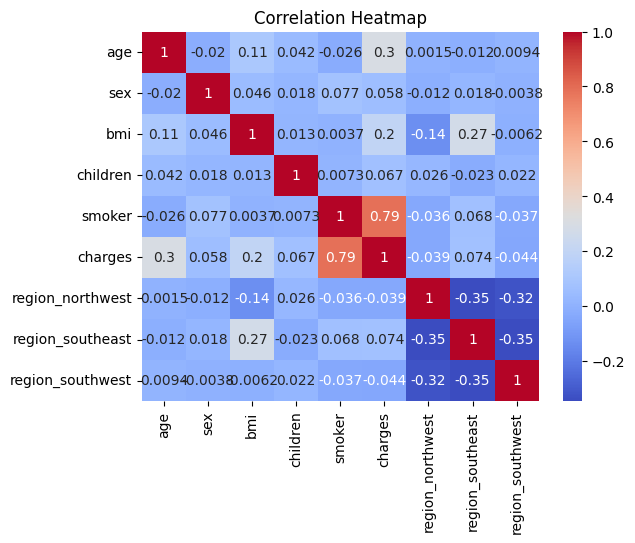

In [28]:
# Correlation Analysis (Pearson's  Correlation  Coefficient)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
'''
1) From the correlation heatmap, we can see that smoker column has highest correlation with charges column.
2) From the correlation heatmap, we can see that bmi column has moderate correlation with charges column.
3) From the correlation heatmap, we can see that age column has moderate correlation with charges column.
'''

In [ ]:
# We are going to create 2 models
#1 Simple linear regression model - charges - smoker
#2 Mulitple linear regression model - charges - age + BMI  + Smoker

In [ ]:
# Simple Linear Regression Model

In [35]:
# Separating input and output features
X = df[['smoker']]
y = df['charges']

In [31]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [32]:
# Fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Taking predictions from the trained model  on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [42]:
# Model Evaluation
from sklearn.metrics import r2_score
print ('R2 Score for training data:',np.round (r2_score(y_train, y_train_pred),2))
print ('R2 Score for testing data:', np.round (r2_score(y_test, y_test_pred),2))

R2 Score for training data: 0.63
R2 Score for testing data: 0.59


In [ ]:
# Multiple Linear Regression model

In [36]:
# # Separating input and output features
X = df[['smoker']]
y = df['charges']

In [37]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [38]:
# Taking predictions from the trained model  on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [41]:
# Model Evaluation
from sklearn.metrics import r2_score
print ('R2 Score for training data:',np.round (r2_score(y_train, y_train_pred),2))
print ('R2 Score for testing data:', np.round (r2_score(y_test, y_test_pred),2))

R2 Score for training data: 0.63
R2 Score for testing data: 0.59


In [ ]:
'''
1) Mulitple regression model is performing better than simple linear regression model.
2) Difference between training and testing is within 5% which means model is not overfitting.
'''

In [ ]:
'''
Now, to further increase the performance of the model we can do few things,
CLip the outliers (bmi and charges)
you can try and apply a few transformation  (log transformation, sqrt transformation, etc) on the columns to make the data more normally distributed.
Feature engineering(take help of subject matter experts)
'''

In [43]:
# Transformation Example
df['log_bmi'] = np.log(df['bmi'])
df['exp_bmi'] = np.exp(df['bmi'])
df['sqrt_bmi'] = np.sqrt(df['bmi'])
df['log_charges'] = np.log(df['charges'])
df['exp_charges'] = np.exp(df['charges'])
df['sqrt_charges'] = np.sqrt(df['charges'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
